# **Reclaiming Solid Wastes:**

Problem Source: F. S. Hillier and G. J. Lieberman, "Introduction to Mathematical Programming," 2nd Edition, McGraw-Hill Inc., New York, 1995.

**Problem Statement:**

The SAVE-IT COMPANY operates a reclamation center that collects four types of solid waste materials and treats them so that they can be amalgamated into a salable product. (Treating and amalgamating are separate processes.) Three different grades of this product can be made (see the first column of Table 3.16), depending upon the mix of the materials used. Although there is some flexibility in the mix for each grade, quality standards may specify the minimum or maximum amount allowed for the proportion of a material in the product grade. (This proportion is the weight of the material expressed as a percentage of the total weight for the product grade.) For each of the two higher grades, a fixed percentage is specified for one of the materials. These specifications are given in Table 3.16 along with the cost of amalgamation and the selling price for each grade.

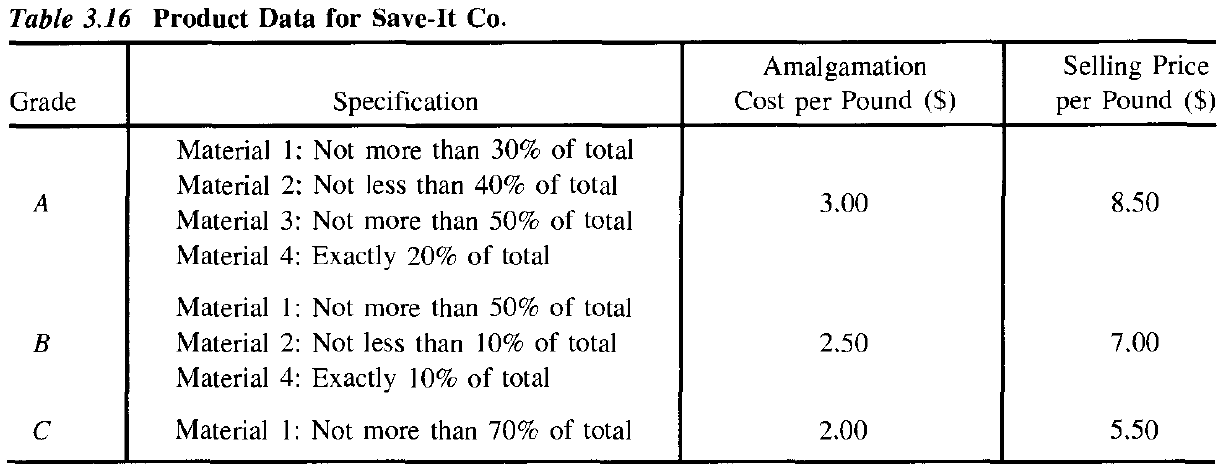

The reclamation center collects its solid waste materials from regular sources and so is normally able to maintain a steady rate for treating them. Table 3.17 gives the quantities available for collection and treatment each week, as well as the cost of treatment, for each type of material.

The Save-It Co. is solely owned by Green Earth, an organization devoted to dealing with environmental issues, so Save-It's profits are used to help support Green Earth's activities. Green Earth has raised contributions and grants, amounting to $ \$30,000$ per week, to be used exclusively to cover the entire treatment cost for the solid waste materials. The board of directors of Green Earth has instructed the management of Save-It to divide this money among the materials in such a way that at least half of the amount available of each material is actually collected and treated. These additional restrictions are listed in Table 3.17.

Within the restrictions specified in Tables 3.16 and 3.17, management wants to determine the amount of each product grade to produce and the exact mix of materials to be used for each grade so as to maximize the total weekly profit (total sales income minus total amalgamation and treatment cost).

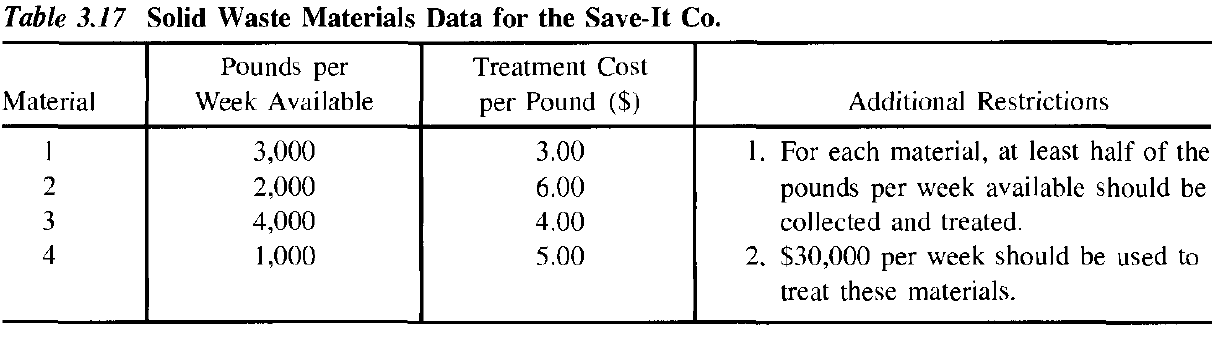

**Modeling:**

$y_{i} \qquad  i\in {A,B,C} \quad $   number of pounds of product grade $i$ produced per week

$z_{ij} \qquad  i\in {A,B,C} \quad j\in {1,2,3,4} \quad$   proportion of material $j$ in product grade $i$

$x_{ij}=z_{ij}y_{i} \qquad  i\in {A,B,C} \quad j\in {1,2,3,4} \quad$   number of pounds of material $j$ allocated to product grade $i$ per week

$\\ $

$Objective\ Function:\\ $

$Max\ Z = 5.5(x_{A1}+x_{A2}+x_{A3}+x_{A4})+4.5(x_{B1}+x_{B2}+x_{B3}+x_{B4})+3.5(x_{C1}+x_{C2}+x_{C3}+x_{C4})$

$\\ $

$Constraints:\\ $

Mixture specifications (second column of Table 3. 16 ):

$x_{A1} \leq 0.3(x_{A1}+x_{A2}+x_{A3}+x_{A4})$

$x_{A2} \geq 0.4(x_{A1}+x_{A2}+x_{A3}+x_{A4})$

$x_{A3} \leq 0.5(x_{A1}+x_{A2}+x_{A3}+x_{A4})$

$x_{A4} = 0.2(x_{A1}+x_{A2}+x_{A3}+x_{A4})$

$x_{B1} \leq 0.5(x_{B1}+x_{B2}+x_{B3}+x_{B4})$

$x_{B2} \geq 0.1(x_{B1}+x_{B2}+x_{B3}+x_{B4})$

$x_{B4} = 0.1(x_{B1}+x_{B2}+x_{B3}+x_{B4})$

$x_{C1} \leq 0.7(x_{C1}+x_{C2}+x_{C3}+x_{C4})$

Availability of materials (second column of Table 3.17):

$x_{A1}+x_{B1}+x_{C1} \leq 3000$

$x_{A2}+x_{B2}+x_{C2} \leq 2000$

$x_{A3}+x_{B3}+x_{C3} \leq 4000$

$x_{A4}+x_{B4}+x_{C4} \leq 1000$

Restrictions on amounts treated (right side of Table 3.17):

$x_{A1}+x_{B1}+x_{C1} \geq 1500$

$x_{A2}+x_{B2}+x_{C2} \geq 1000$

$x_{A3}+x_{B3}+x_{C3} \geq 2000$

$x_{A4}+x_{B4}+x_{C4} \geq 500$

Restriction on treatment cost (right side of Table 3.17):

$3(x_{A1}+x_{B1}+x_{C1})+6(x_{A2}+x_{B2}+x_{C2})+4(x_{A3}+x_{B3}+x_{C3})+5(x_{A4}+x_{B4}+x_{C4})=30000$

Nonnegativity constraints:

$x_{ij} \geq 0$

## Using Pulp Library

In [1]:
!pip install pulp
from pulp import *
import numpy as np
import pandas as pd

In [2]:
# Defining Variables

x = {(i, j): LpVariable(f"x_{i}{j}", lowBound=0) for i in ["A", "B", "C"] for j in range(1, 5)}

In [3]:
# Defining Objective Function

model = LpProblem("Maximize_Profit", LpMaximize)

model += (
    5.5 * lpSum(x["A", j] for j in range(1, 5))
    + 4.5 * lpSum(x["B", j] for j in range(1, 5))
    + 3.5 * lpSum(x["C", j] for j in range(1, 5)),
    "Total_Cost"
)

In [4]:
# Constraints

# Mixture specifications
model += x["A", 1] <= 0.3 * lpSum(x["A", j] for j in range(1, 5))
model += x["A", 2] >= 0.4 * lpSum(x["A", j] for j in range(1, 5))
model += x["A", 3] <= 0.5 * lpSum(x["A", j] for j in range(1, 5))
model += x["A", 4] == 0.2 * lpSum(x["A", j] for j in range(1, 5))
model += x["B", 1] <= 0.5 * lpSum(x["B", j] for j in range(1, 5))
model += x["B", 2] >= 0.1 * lpSum(x["B", j] for j in range(1, 5))
model += x["B", 4] == 0.1 * lpSum(x["B", j] for j in range(1, 5))
model += x["C", 1] <= 0.7 * lpSum(x["C", j] for j in range(1, 5))

# Availability of materials using for loop for similar constraints
material_limits = [3000, 2000, 4000, 1000]
for j in range(1, 5):
    model += lpSum(x[i, j] for i in ["A", "B", "C"]) <= material_limits[j-1]

# Restrictions on amounts treated using a for loop
min_treatment = [1500, 1000, 2000, 500]
for j in range(1, 5):
    model += lpSum(x[i, j] for i in ["A", "B", "C"]) >= min_treatment[j-1]

# Restriction on treatment cost
model += (
    3 * lpSum(x[i, 1] for i in ["A", "B", "C"])
    + 6 * lpSum(x[i, 2] for i in ["A", "B", "C"])
    + 4 * lpSum(x[i, 3] for i in ["A", "B", "C"])
    + 5 * lpSum(x[i, 4] for i in ["A", "B", "C"])
    == 30000
)

In [5]:
#Model summary

model

Maximize_Profit:
MAXIMIZE
5.5*x_A1 + 5.5*x_A2 + 5.5*x_A3 + 5.5*x_A4 + 4.5*x_B1 + 4.5*x_B2 + 4.5*x_B3 + 4.5*x_B4 + 3.5*x_C1 + 3.5*x_C2 + 3.5*x_C3 + 3.5*x_C4 + 0.0
SUBJECT TO
_C1: 0.7 x_A1 - 0.3 x_A2 - 0.3 x_A3 - 0.3 x_A4 <= 0

_C2: - 0.4 x_A1 + 0.6 x_A2 - 0.4 x_A3 - 0.4 x_A4 >= 0

_C3: - 0.5 x_A1 - 0.5 x_A2 + 0.5 x_A3 - 0.5 x_A4 <= 0

_C4: - 0.2 x_A1 - 0.2 x_A2 - 0.2 x_A3 + 0.8 x_A4 = 0

_C5: 0.5 x_B1 - 0.5 x_B2 - 0.5 x_B3 - 0.5 x_B4 <= 0

_C6: - 0.1 x_B1 + 0.9 x_B2 - 0.1 x_B3 - 0.1 x_B4 >= 0

_C7: - 0.1 x_B1 - 0.1 x_B2 - 0.1 x_B3 + 0.9 x_B4 = 0

_C8: 0.3 x_C1 - 0.7 x_C2 - 0.7 x_C3 - 0.7 x_C4 <= 0

_C9: x_A1 + x_B1 + x_C1 <= 3000

_C10: x_A2 + x_B2 + x_C2 <= 2000

_C11: x_A3 + x_B3 + x_C3 <= 4000

_C12: x_A4 + x_B4 + x_C4 <= 1000

_C13: x_A1 + x_B1 + x_C1 >= 1500

_C14: x_A2 + x_B2 + x_C2 >= 1000

_C15: x_A3 + x_B3 + x_C3 >= 2000

_C16: x_A4 + x_B4 + x_C4 >= 500

_C17: 3 x_A1 + 6 x_A2 + 4 x_A3 + 5 x_A4 + 3 x_B1 + 6 x_B2 + 4 x_B3 + 5 x_B4
 + 3 x_C1 + 6 x_C2 + 4 x_C3 + 5 x_C4 = 30000

VAR

In [6]:
#Solving model

model.solve()
print('Optimal Solution:', pulp.value(model.objective))

Optimal Solution: 35109.649190000004


In [7]:
for variables in model.variables():
  print(f'{variables.name}:{variables.varValue}')

x_A1:412.2807
x_A2:859.64912
x_A3:447.36842
x_A4:429.82456
x_B1:2587.7193
x_B2:517.54386
x_B3:1552.6316
x_B4:517.54386
x_C1:0.0
x_C2:0.0
x_C3:0.0
x_C4:0.0


In [8]:
VNames = []
for variables in model.variables():
  VNames.append(variables.name)

VValue = []
for variables in model.variables():
  VValue.append(np.round(variables.varValue, 2))

data = {'Variables': VNames, 'Value': VValue}
pd.DataFrame(data, index = range(1, len(VValue)+1))

,Variables,Value
1,x_A1,412.28
2,x_A2,859.65
3,x_A3,447.37
4,x_A4,429.82
5,x_B1,2587.72
6,x_B2,517.54
7,x_B3,1552.63
8,x_B4,517.54
9,x_C1,0.00
10,x_C2,0.00


In [9]:
print('Current Status: ', LpStatus[model.status])

Current Status:  Optimal


## Using Pyomo Library

In [10]:
!pip install pyomo
!apt-get install -y -qq glpk-utils

from pyomo.environ import *

In [11]:
# Create a model
model = ConcreteModel()

# Sets
model.I = ["A", "B", "C"]
model.J = range(1, 5)

# Parameters
cost = {"A": 5.5, "B": 4.5, "C": 3.5}
material_limits = {1: 3000, 2: 2000, 3: 4000, 4: 1000}
material_min_limits = {1: 1500, 2: 1000, 3: 2000, 4: 500}
treatment_cost = {1: 3, 2: 6, 3: 4, 4: 5}

# Variables
model.x = Var(model.I, model.J, within=NonNegativeReals)

# Objective function
def profit_rule(model):
    return (
        sum(cost[i] * sum(model.x[i, j] for j in model.J) for i in model.I)
    )
model.Total_Profit = Objective(rule=profit_rule, sense=maximize)

# Constraints

# Mixture specifications for grade A
model.gradeA_mix1 = Constraint(expr=model.x["A", 1] <= 0.3 * sum(model.x["A", j] for j in model.J))
model.gradeA_mix2 = Constraint(expr=model.x["A", 2] >= 0.4 * sum(model.x["A", j] for j in model.J))
model.gradeA_mix3 = Constraint(expr=model.x["A", 3] <= 0.5 * sum(model.x["A", j] for j in model.J))
model.gradeA_mix4 = Constraint(expr=model.x["A", 4] == 0.2 * sum(model.x["A", j] for j in model.J))

# Mixture specifications for grade B
model.gradeB_mix1 = Constraint(expr=model.x["B", 1] <= 0.5 * sum(model.x["B", j] for j in model.J))
model.gradeB_mix2 = Constraint(expr=model.x["B", 2] >= 0.1 * sum(model.x["B", j] for j in model.J))
model.gradeB_mix3 = Constraint(expr=model.x["B", 4] == 0.1 * sum(model.x["B", j] for j in model.J))

# Mixture specification for grade C
model.gradeC_mix = Constraint(expr=model.x["C", 1] <= 0.7 * sum(model.x["C", j] for j in model.J))

# Availability of materials
model.material_availability = ConstraintList()
for j in model.J:
    model.material_availability.add(sum(model.x[i, j] for i in model.I) <= material_limits[j])

# Restrictions on amounts treated
model.amounts_treated = ConstraintList()
for j in model.J:
    model.amounts_treated.add(sum(model.x[i, j] for i in model.I) >= material_min_limits[j])

# Restriction on treatment cost
model.treatment_cost = Constraint(
    expr=sum(treatment_cost[j] * sum(model.x[i, j] for i in model.I) for j in model.J) == 30000
)

# Solve the model
SolverFactory('glpk').solve(model)

model.display()

Model unknown

  Variables:
    x : Size=12, Index={A, B, C}*{1, 2, 3, 4}
        Key      : Lower : Value                 : Upper : Fixed : Stale : Domain
        ('A', 1) :     0 :      412.280701754385 :  None : False : False : NonNegativeReals
        ('A', 2) :     0 :      859.649122807017 :  None : False : False : NonNegativeReals
        ('A', 3) :     0 :      447.368421052632 :  None : False : False : NonNegativeReals
        ('A', 4) :     0 :      429.824561403509 :  None : False : False : NonNegativeReals
        ('B', 1) :     0 :      2587.71929824561 :  None : False : False : NonNegativeReals
        ('B', 2) :     0 :      517.543859649123 :  None : False : False : NonNegativeReals
        ('B', 3) :     0 :      1552.63157894737 :  None : False : False : NonNegativeReals
        ('B', 4) :     0 :      517.543859649123 :  None : False : False : NonNegativeReals
        ('C', 1) :     0 :                   0.0 :  None : False : False : NonNegativeReals
        ('C', 2)